# Выявление аномалий во временных рядах

Аномалии во временных рядах  - это нерегулярные значения отсчетов ВР или их закономерность, которые значительно отклоняется от ожидаемого поведения временного ряда в целом.
В данных временного ряда аномалией может быть внезапный всплеск, спад продаж или любое другое значительное изменение, выходящее за рамки обычного поведения.

В известных классификациях существует 3 наиболее распространенных типа аномалий с точки зрения контекста:
* __Точечные аномалии__ (__глобальные аномалии__): Возникают, когда значение отсчета данных значительно отличается от распределения данных.
* __Коллективные аномалии__: В этом случае отдельные точки данных могут не выглядеть аномальными, но последовательность точек помечается как аномалия.
* __Контекстуальные аномалии__ (__локальные аномалии__): Некоторые точки данных могут считаться нормальными в одном контексте, но идентифицироваться как аномалии в другом контексте. Часто такие аномалии связаны с внешними факторами, например изменение погоды (аномально теплая зима).


Отметим, следующее.
* В ряде случаев контекстуальные аномалии   могут быть приведены к глобальным путем преобразования данных либо их обработки.
* Коллективные аномалии могут быть в ряде случаев представлены как последовательный набор локальных/глобальных аномалий.
* В других случая коллективные аномалии могут требовать знания [отношений между отсчетами данных](https://jsinkers.github.io/notes/notebooks/machine_learning/02_anomaly_detection.html) (например нарушение сезонности). В этом случае каждая точка не будет аномальна сама по себе.
* Во всех случаях для выявления аномалий нам потребуется ввести __метрику (меру)__ по которой аномалии будут оценены (`anomaly score`) и __пороговое значение__ ([`Anomaly Threshold`](https://link.springer.com/article/10.1007/s10618-023-00988-8)) при котором аномалии будут считаться выявлеными. Отметим, что  если аномалии или точно нормальные данные известны, то важна не только точность выявления аномалий, но и число ложно выявленных / число пропущенных аномалий. В некоторых случаях отмечается, что следует отдавать [предпочтение интегральным метрикам](https://timeeval.github.io/evaluation-paper/) (считающим <tt>area under curve</tt>, как например, [<tt>AUC-ROC</tt>](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=91fec9ed91fec55dcea35a456fdd8cc1052e3569)). Отметим, что в литературе предлагаются и без-пороговые методы обнаружения аномалий [(Threshold-free)](https://australasiantransportresearchforum.org.au/wp-content/uploads/2022/05/ATRF2022_Resubmission_39.pdf). 
* Иногда вместо задания `Anomaly Threshold` можно задать гипотезу о загрязненности данных (`contamination`). То есть мы ищим самые не регулярные данные в заданном числе, например 1\%.
* При этом важно понимать что для коллективных аномалий [метрика часто считаться](https://victoriametrics.com/blog/victoriametrics-anomaly-detection-handbook-chapter-2/) тоже по всему периоду аномальности.
* В отличии от ряда других задач анализа временных рядов, в данной задаче как правило не используют подходы со значительной автомтизацией (типа `automl`). Это связано с необходимостью тщательного принятия решений о конкретных видах аномалий. Часто это также связано с необходимостью ассоциировать аномалии и их <tt>корневые причины</tt> - то есть причины их возникновения. Принятие решений об аномалиях часто требует экспертного знания в области получения ВР.
* модели выявления аномалий (как и другие методы машинного обучения) [могут устаревать](https://victoriametrics.com/blog/victoriametrics-anomaly-detection-handbook-chapter-3/) в силу нестационарности данных. Поэтому следует переодически тестировать или обновлять модели.
* В ряде случаев, при делении ВР на сегменты, [отдельные сегменты](https://s-ai-f.github.io/Time-Series/outlier-detection-in-time-series.html) могут быть также рассмотрены как аномалии. В других случаях сегменты могут быть рассмотрены как коллективные аномалии.
  
<img src="https://research.einar.partners/wp-content/uploads/2021/12/Types-of-anomaly-EP-v2.jpg" width="700">



С точки зрения доменных задач существует несколько типов аномалий. В том числе: 
* __локализованные во времени аномалии__ (как правило не значительные участки ВР, чье поведение так или иначе отличается от остального ВР) Важно понимать, что [могут быть выделены](https://forecastegy.com/posts/time-series-anomaly-detection-python/):
    *  __аномалии непосредственно__ как некоторое отклонение поведения ВР на определнном участке которые чаще всего представляет собой нарушение поведения ВР. Это часто локальные аномалии. Часто требуется дать объяснение таким аномалиям, прежде чем их компенсировать.
    *  __выборсы__ - как некоторые экстремальное поведение ВР, связанное с ошбиками, поломками и другими "Значительными факторами". Такие аномалии чаще всего надо выбрасывать.
* __новизна данных__  - аномалии задающие пермонентые (продолжительное) изменения во ВР. По определению это не выбросы. Как правило это появление некоторого ранее не наблюдаемого паттерна поведения в данных. [Причиной таких аномалий](https://victoriametrics.com/blog/victoriametrics-anomaly-detection-handbook-chapter-1/) часто является само поведение системы. Новизна в данных может быть:
  * __точки перегиба__ - как правило те, в которых тренд значительно меняется
  * __Точки значительного влияния__ - те в которых паттерн данных меняет свою форму
  * 

> Отметим, что при детекции новизны `anomaly score` [должен счтитаться](https://victoriametrics.com/blog/victoriametrics-anomaly-detection-handbook-chapter-2/) по некоторому окну/временноу интервалу, в котором новизна принимается. При этом может быть также проведен анализ временного повдения метрики для снижения чилса ложных срабатываний.
> Также [важно понимать](https://scikit-learn.org/stable/modules/outlier_detection.html#novelty-and-outlier-detection), что технически новизна в данных предполагает что сами по себе данные не обладают подобными аномалиями.

<!-- [Первые отлчиаются](https://neptune.ai/blog/anomaly-detection-in-time-series) от вторых тем, что выбросы хотелось бы устранить в то время как новизна в данных является предметом интереса. -->
<img src="https://victoriametrics.com/blog/victoriametrics-anomaly-detection-handbook-chapter-2/anomaly-novelty.png" width="700">



<tt>Аномалии временных рядов</tt> - это [широкое понятие](https://arundo-adtk.readthedocs-hosted.com/en/stable/userguide.html#anomaly-types), которое может относиться ко многим различным типам событий во временных рядах. Всплеск значений, сдвиг волатильности, нарушение сезонной закономерности и т. д. - все это может быть аномальным или нормальным, в зависимости от конкретного контекста - то есть критерия, по которму данные будут считаться не нормальными. 

С точки зрения анализа формы можно выделить такие примеры аноалий во временных рядах, как:
* __<tt>точечне выборсы</tt>__ ([__Outlier__](https://arundo-adtk.readthedocs-hosted.com/en/latest/userguide.html#outlier)) - это как правило глобальные аномалии, связанные ошибками измерений, выходом из строя оборудования или другими факторами, приводящими к значительному эффекту для ВР (к глобальному эффекту/ значительному нарушению временной зависимости как таковой).
* __<tt>сдвиг уровня</tt>__ ([__Level Shift__](https://arundo-adtk.readthedocs-hosted.com/en/latest/userguide.html#spike-and-level-shift)) - это аномалии, приводяющие к смещению среднего уровня/тренда ВР, без изменения остальных его составляющих. Такие изменения могут быть пермонентными или точечными (__spikes__). В более общем смысле данный тип аномалий можно бы было назвать [__Trend shift__](https://openreview.net/pdf?id=r8IvOsnHchr).
* __<tt>Изменение паттерна</tt>__ ([__Pattern Change__](https://arundo-adtk.readthedocs-hosted.com/en/latest/userguide.html#pattern-change))- изменение шаблона поведения ВР, например формы ВР или его __валатильности__ (__изменение дисперсии__). Как правило это резкое и/или кратковременное изменение.
* __<tt>Изменение сезонности</tt>__ ([__Seasonality__](https://arundo-adtk.readthedocs-hosted.com/en/stable/userguide.html#seasonality)) - такое изменение часто связано с сезонныи факторами, например влиянием дневной активности на данные.


>Ометим, необходимо [различать](https://arundo-adtk.readthedocs-hosted.com/en/stable/userguide.html#seasonality) <tt>сезонные</tt> и <tt>циклические</tt> части ВР. \
__Сезонный ряд__ всегда  ожидается что имеет обычно интерпретируемый и известный период (часто фиксированный, например день, квартал и тд, но не всегда). \
__Циклический временной ряд__ не следует фиксированному периодическому шаблону из-за своей физической природы, даже если в нем появляются повторяющиеся аналогичные подсерии. Например, траектория движения подвижной детали во вращающемся оборудовании представляет собой трехмерный циклический временной ряд, длина цикла которого зависит от скорости вращения и не обязательно является фиксированной. Применить к нему разложение по сезонности будет проблематично, поскольку каждый цикл может иметь несколько иную длину, и остатки разложения будут вводить в заблуждение при обнаружении аномалий
>
> Если имеется __многомерный временной ряд__, необходимо понять, является ли задача обнаружения аномалий разделимой по компонентам или нет.
Во многих случаях обнаружение аномалий по каждой компоненте параллельно удовлетворяет требованиям. Например, если есть двумерный временной ряд, температура и влажность,  то применение одномерного детектора к температуре и влажности соответственно, а затем агрегирование результатов удовлетворит может сработать. Если необходимо совместное выявление аномалий,то ВР чаще всего необходимо преобразовывать для выявления онной одновременно во всех компонентах. 

C точки зрения подходов к обнаружению аномалий могут быть выделены:
* *полностью контролируемые методы*, в которых нормальные и аномальные лейблы помечены. 
* *полуконтролируемые методы*, в которых известно, что часть выборки - это аномалии.
* *неконтролиуруемые методы*, в которых аномалии определются на основе некоторых общих (внеших к данным) правил.

Отметим, что:
+ для [__полностью контролируемых__](https://jsinkers.github.io/notes/notebooks/machine_learning/02_anomaly_detection.html) (`supervised`) методов необходимо, чтобы объем выборки аномалий был сопостовим с выборкой данных без аномалий. При этом важной метрикой вероятно будет  `recall` как число ложных срабатываний такого детектора. Важно понимать что вторым недостатком подхода является не гарантированность выявления  аномалий, отсутствующих в тренировочной выборке (например [не подходят](https://victoriametrics.com/blog/victoriametrics-anomaly-detection-handbook-chapter-3/) для выявления новизны в данных). 
+ Часто предполагая, незначительный объем аномалий можно предположить, что подходы __полуконтролируемого обнаружения__ (`semi-supervised`) могут быть выбраны как некоторое первое предположение наравне с неконтролируемыми методами для без анализа выборки. При этом если выделяется выборка без аномалий, то необходимо быть в этом уверенным. [Кроме того](https://jsinkers.github.io/notes/notebooks/machine_learning/02_anomaly_detection.html) при высоком уровне нестационарности в данных декторы могут распозновать новые данные как аномалии. 
+ [Проблемы обнаружения аномалий в реальном мире](https://arundo-adtk.readthedocs-hosted.com/en/stable/userguide.html#unsupervised-vs-supervised) обычно страдают от недостатка помеченных исторических аномалий, что может помешать пользователям построить надежную контролируемую модель. В этом случае лучше использовать __неконтролируемые методы__ (основанные на правилах, `unsupervise`). [В этих методах](https://jsinkers.github.io/notes/notebooks/machine_learning/02_anomaly_detection.html) предполагается что аномалии могут быть отбораны как имеющие различие в опредленных признаках временного ряда (в определенном смысле кластеризованы как шумы).
+ При этом в __неконтролируемых методах__ как правило [подразумевается](https://victoriametrics.com/blog/victoriametrics-anomaly-detection-handbook-chapter-3/), что аномалии это лишь небольшая часть исходных данных.
+ В ряде случаев одного метода - или одного временного ряда может быть не достаточно для принятия решения о значимых аномалиях. В этом случае необходимо составлять __цепочки правил__ или использовать более сложные (однако и менее интерпретируемые) методы.
+ Поиск новизны в данных [часто может быть рассмотрен](https://victoriametrics.com/blog/victoriametrics-anomaly-detection-handbook-chapter-3/) как задача полуконтролируемого обучения. Однако, при этом следует принимать "чистоту" исходного набора данных во внимание (отсуствие релевантных решений). Также стоит понимать, что чем тоньше грань между аномалией и стандартным поведением ВР, тем больше будет пропусков таких значений.
+ Также отметим, [что технически](https://victoriametrics.com/blog/victoriametrics-anomaly-detection-handbook-chapter-1/), если метод преполагает, что в ходе работы вы маркируете данные как аномальные и нет для его дальнейшей работы, то задачу можно считать __самоконтролируемой__ (Self-Supervised Learning).  Также, в тех случаях, когда в полуконтролируемых методах задана лишь небольшая часть выборки как нормальная, то технически задачу можно считать __слабоконтролируемой__ (weak supervised).
+ При использовании контролируемых методов выборки часто не сбалансираованны, поэтому в ряде случаев [данные аугментируют аномалиями](https://www.arundo.com/articles/tsaug-an-open-source-python-package-for-time-series-augmentation) для расширения выборки. Однако следует быть крайней аккуратным так как это может привести к переобучению под аугментированные данные.

Методы неконтролируемого (и полуконтролируемого) поиска аномалий во временных рядах методы можно разделять на несколько группы:
* __Методы на основе правил__ ([__rule based__](https://adtk.readthedocs.io/en/stable/notebooks/demo.html)) - совокупность подхода простых (часто линейных и обратимых) преобразований ВР и выставления порога для их результатов. Эта группа методов наиболее интерпретируема. К этой же группе можно отнести сатистические методы ([__Statistical-model-based__](https://arxiv.org/html/2402.02007v1)) - это методы в которых аномалиями принимаются данные, не удволитворяющие опредленным статистическим критериям. Например правилу $3\sigma$. 
* __Методы на основе остатка предсказания__ ([__prediction-based__/__forecast based__](https://arxiv.org/html/2402.02007v1)) - построение прогнозной модели и сравнение прогноза по имеющемуся ряду (*in-sample prediction*) c его фактическими значениями. Другими словами анализ остатка модели предсказания. Этот подход  лучше  применим к ВР с выраженной сезонной или циклической состовляющим. В этом подходе важно понимать свойства используемых алгоритмов, например их устойчивость к нестационарности, чтобы правильно интерпретировать результат. В данных подхода отличие результатов предсказания от оригинальных данных по заданной метрике будет `anomaly score`. _В ряде случаев вместо непосредственного анализа остатков могут быть испльзованы и другие меры, например `DTW` расстояние._ Также важно отметить, что ряд алгоритмов предсказания может быть использован с предсказанием дисперсии или других вероятностных характеристик. Тогда помимо остатка от точечных предсказаний могут быть оценены и отклонения [от предсказанных интервальных величин](https://forecastegy.com/posts/time-series-anomaly-detection-python/).  Примеры методов `ARIMA` (имеет встроенную оценку дисперсии предсказаний), `Prophet` и другие. 
* __Метрические методы__ [__proximity-based__](https://arxiv.org/html/2402.02007v1): выявление аномалии на основе информации о близости параметров или последовательности параметров фиксированной длины, подходит для выявления точечных аномалий и выбросов (например кластеризация `DBSCAN`). Также __ML методы__ /__Model agnostic__, например, `изоляционный лес`.
* __Методы на основе репрезентации или реконструкции ВР__ ([__reconstruction-based__](https://arxiv.org/html/2402.02007v1)) - методы, основанные на репрезентации или восстоновлении отображения ВР. Основная идея заключается в том, что нетипичное поведение имеет более высокую ошибку восстоновления ВР .В некотором смысле этот метод срадни предыдущему. Оба мтода позволяют выявлять как точечные аномалии, так и групповые аномалии. Эти методы тоже могут быть __Model agnostic__. Это отличает их от методов на основе предсказаний (а также их отличает отсутствие самой необходимости предсказания). Например, `PCA`  или `автоэнкодер`. В таких методах не сложно ввести `anomaly score` как ошибку восстоновления данных. Иногда вместо восстоновления данных анализируют сжатое пространство данных на регулярность.

Отметим, что часто полезно провести предворительное разложение или преобразование ВР, а уже затем выбирать подход к поиску анаомалий. При этом к предварительным разложениям ВР могут относится как уже известные разложения типа: тренд, сезонность, остаток, или преобразования Бокса-Кокса, так и репрезентация ВР, например в виде пространства признаков. В последнем случае ВР сводится к таблице, поэтому не всегда все аномалии могут быть выделены. Другими словами признаки должны отображать те свойства ВР, для которых тесты на аномалии потребуются.

Отметим, что подходы построены в порядке возростения их сложности и отсуствия интерпретируемости. Методы на основе правил [не всегда подходят](https://victoriametrics.com/blog/victoriametrics-anomaly-detection-handbook-chapter-1/) для сложных  и продолжительных ВР. Особенно если сами паттерны ВР не могут быть формализованы в достаточной степени. 

## Импорт данных

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set(style="whitegrid")
plt.rc('figure',figsize=(12,3))
plt.rc('font',size=15)

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)


In [2]:
try:
    import adtk
except:
    !pip install adtk
finally:
    import adtk

Данные: набор востребованности такси в городе Нью Йорк с шагом в 1 час.

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_stdlib_context

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.set_index(['timestamp']).asfreq('h')

FREQ = data.index.freq

data.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 01:00:00,6210
2014-07-01 02:00:00,3820
2014-07-01 03:00:00,2369
2014-07-01 04:00:00,2221


Зададим функцию для визуализации. Функция будет принимать на вход массив данных в формате `DataFram`, где индексы - это временные метки.
Также в функцию могут быть заданы аномалии в виде `DataFram`, в котором метки `True` соответствуют аномалиям, а остальные метки имеют значения `False`.



In [5]:
def plot_an(data,  anomalies =None, column = 'value', figsize = (12,3), ax=None,
             fill_an = False, score_column=None, anomaly_column = None):
    
    if ax == None:
        fig, ax = plt.subplots(figsize=figsize)
    
    y = data[column].values.reshape(-1, 1)
    ax.plot(data.index, y, c='k', label = column, zorder=10)    
       
    if  anomalies is not None:   
        if anomaly_column is None: 
            anomaly_column = column
        
        anomalies = pd.DataFrame(anomalies, columns=[anomaly_column, score_column])

        idxs = pd.DataFrame(anomalies).loc[anomalies[anomaly_column] ==True].index
        an_data = pd.DataFrame(data.loc[idxs,column] )

        y_an = an_data.values.reshape(-1, 1)
        
        if fill_an:
            idx = data.index
            points = [{'fp':idx[i-1], 'lp':idx[i+1]} for i in range(1,len(idx)-1) if anomalies.iloc[i].value==True]
            points = pd.DataFrame(points)
            [ax.axvspan(points.fp[i], points.lp[i], alpha=.5, color='green', zorder=2) for i in range(len(points))];
        
        an_size = 20
        if score_column is not None:
            score_ = anomalies.loc[anomalies[score_column] !=0,score_column].values.squeeze()
#             t      = anomalies.loc[anomalies[score_column] !=0,score_column].index
            an_size = 40*np.abs(score_)#20*np.abs(score_- score_.mean())/score_.std()

        ax.scatter(an_data.index, y_an, marker='o', s=an_size, color = 'red', label = 'Anomaly', zorder=100 )
        #             ax.plot(an_data.index, y_an, marker='.', markersize=8, linewidth=0)
    l = plt.legend()
    l.set_zorder(2000)  # put the legend on top

    return ax
            
    

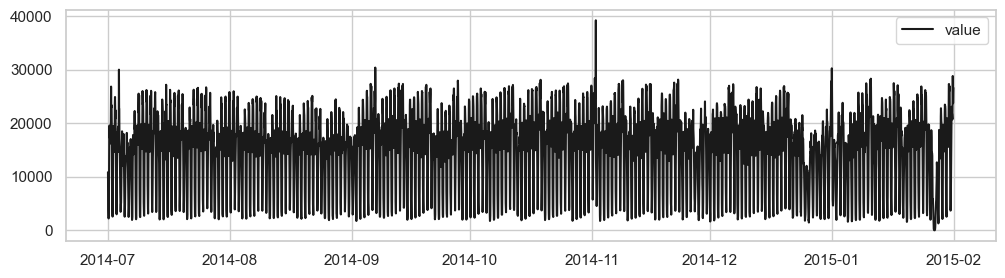

In [6]:
plot_an(data);

## Поиск аномалий на основе правил 

### Отбор аномалий по правилам

Рассмотрим подход к выявлению аномалий при помощи правил (порогов). Одним из фреймворков для таких аномалий является [`ADTK`](https://arundo-adtk.readthedocs-hosted.com/en/stable/userguide.html).
[Фреймворк `ADTK`](https://adtk.readthedocs.io/en/stable/) - это пакет для моделей обнаружения аномалий во временных рядах, основанных на внеших правилах([rule-based/unsupervised](https://arxiv.org/ftp/arxiv/papers/1708/1708.03665.pdf)). 
Фреймворк `ADTK` предлагает набор общих компонентов, которые могут быть объединены в различные типы моделей обнаружения аномалий для разных сценариев. Однако `ADTK` не выбирает и не строит модель для пользователя автоматически. Пользователь должен знать, какой тип аномалии необходимо обнаружить, тогда он может построить модель соответствующим образом. [Приемуществом такого подхода является](https://www.arundo.com/articles/adtk-open-source-time-series-anomaly-detection-in-python) его наглядность и простота настройки. В отличии от подходов на основе машинного обучения этот подход интерпретируемый.
Отдельно отметим, что использование интерпретируемого подхода позволяет определять т.н. корневые причины аномалий, то есть выдвигать гипотезы об их возникновении. 

Для начала попробуем найти глобальные аномалии, выставив __пороговые значения__ при помощи функции `ThresholdAD`. Указанный метод подходит только для выявления глобальных аномалий.

>Отметим, что в `adtk` есть реализация визуализации. Однако, она устарела и несовместима с последними версиями остальных библиотек.

<Axes: >

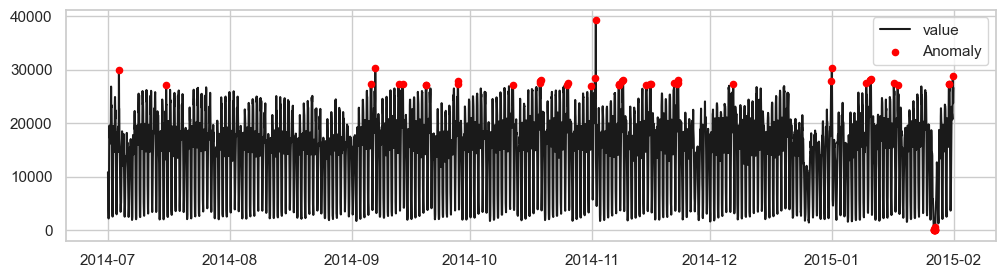

In [7]:
from adtk.detector import ThresholdAD
threshold_val = ThresholdAD(high=27000, low=1000)
anomalies = threshold_val.detect(data.value)
plot_an(data, anomalies)

__Межквартильный диапазон__ `InterQuartileRangeAD` - это еще один широко используемый детектор, основанный на простой исторической статистике, основанный на межквартильном диапазоне (`IQR`). Когда значение выходит за пределы диапазона, определенного $[Q_1-c\times IQR, Q_3+c\times IQR]$ то считается аномалией. Где $IQR=Q_3-Q_1$ - это разница между $25\%$ и $75\%$ квантилями. Этот детектор обычно используется для квантилирования в случае, когда только небольшая часть обучающих данных или даже ни одна из них не является аномальной. Чаще всего $c = 1.5$.  Метод выявляет глобальные аномалии.
> В случае если предполагается нормальное распределение случайной составляющей данных, то метод может быть заменен на метод $3\sigma$. При этом диапазон $Q_3-Q_1 \pm 1.5 IRQ$ будет соответствовать диапазону $2.7\sigma$ или [$99.3%$ данных считаются нормальными](https://stats.stackexchange.com/questions/554631/does-classic-outlier-detection-assume-normality). В целом отмечается, что метод может быть расширен и на [любые другие симетричные распределния](https://bookdown.org/pkaldunn/Book/identifying-outliers.html) однако вероятно с регулированием коэффициента $c$. При этом чем выше коэффициент тем более [редкие и выбивающиеся значения будут выбраны](https://arxiv.org/html/2402.17809v1).
> <img src="https://arxiv.org/html/2402.17809v1/extracted/5434491/fig6.jpg" width="500px">

Перед тем, как проводить выявление аномалий, ВР может быть номализован, например при помощи `z-score`.

<Axes: >

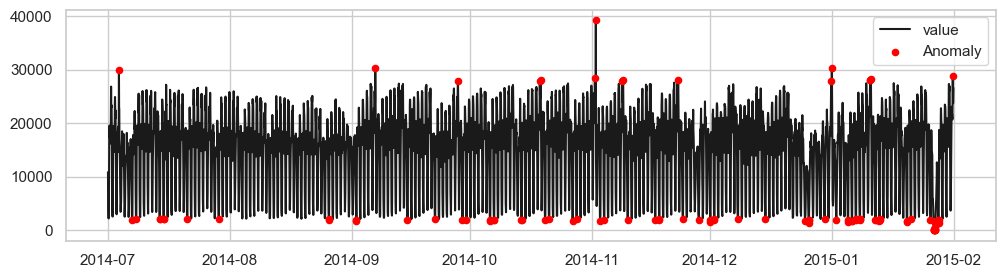

In [8]:
from adtk.detector import InterQuartileRangeAD
iqr_ad = InterQuartileRangeAD(c=0.8)
anomalies = iqr_ad.fit_detect(data)
anomalies = anomalies.squeeze()
plot_an(data, anomalies)

Попробуем почти по аналогии с порогом осуществить поиск глобальнеых аномалий как значений, не попадающих в __диапазон квантилей__. Выбирем за норму $1$ и $99$ квантили. Для этого зададим объект `QuantileAD`. Данный детектор относится к тому же классу что и `IRQ`, однако с иным методом регулирования порога аномалий.  Метод выявляет глобальные аномалии.



<Axes: >

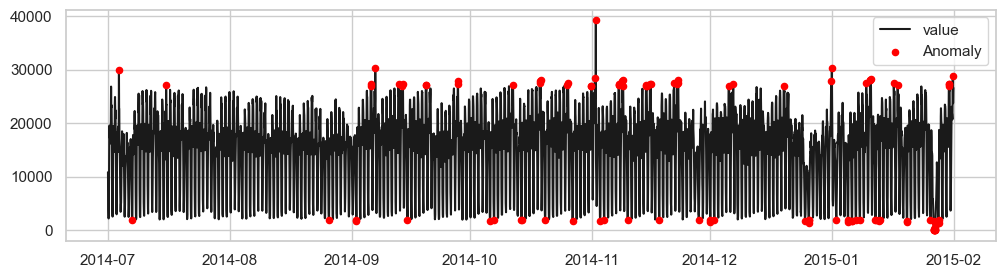

In [9]:
from adtk.detector import QuantileAD

quantile_ad = QuantileAD(high=0.99, low=0.01)
anomalies = quantile_ad.fit_detect(data)

plot_an(data, anomalies)
# plhuetaot(data, anomaly=anomalies, anomaly_color="orange", anomaly_tag="marker");

Глобальные аномалии могут также быть найдены путем __проверки статистических гипотез__. Существуюет несколько канонических тестов на выбросы. Тут мы воспользуемся <tt>тестом обобщенного экстремального изучаемого отклонения(</tt>[`ESD`](https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/esd.htm)) (расширенный [<tt>Grubbs test</tt>](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h3.htm)). `GeneralizedESDTestAD` используется для обнаружения одного или нескольких выбросов в одномерном наборе данных, который соответствует приблизительно нормальному распределению.  Для обобщенного теста `ESD` требуется только указать верхнюю границу предполагаемого количества выбросов. В отличии от других тестов, где необходимо отдельно указывать на искомое число выбросов `k`. Другими словами гипотезы следующие:  
+ `H0`:	аномалий нет,
+ `Ha`:	в выборке присутствует до указанного числа аномалий.
> Отметим, что тест приведен тут для полноты картины. тест предполагает, что данные имеют нормальное распределение. Мы отдельно не проводим этой проверки. Поэтому мы будем проверять аномалии на остатке от разложения данных. То есть без сезонной составляющей и тренда. Для этого воспользуемся функцией [`STL`](https://www.statsmodels.org/devel/generated/statsmodels.tsa.seasonal.STL.html), которой пользовались и ранее.

<Axes: >

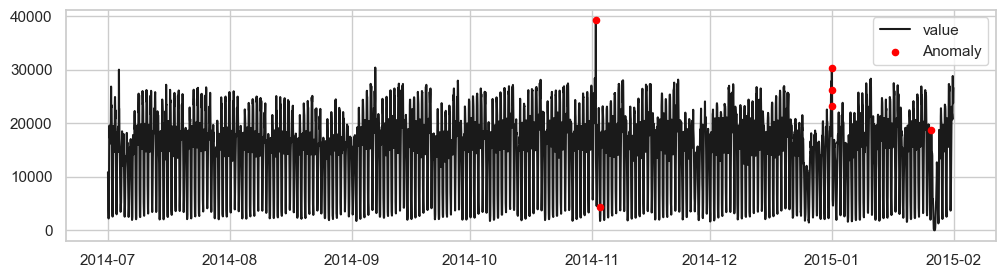

In [10]:
from adtk.detector import GeneralizedESDTestAD
from statsmodels.tsa.seasonal import STL

res = STL(data.values.squeeze(), period = 24).fit()
residuals = pd.DataFrame(res.resid, index = data.index, columns=['value'])

esd_ad = GeneralizedESDTestAD(alpha=0.1)

anomalies = esd_ad.fit_detect(residuals)
# anomalies
plot_an(data, anomalies)

Метод `LevelShiftAD` определяет __изменение уровня значений__, _отслеживая разницу между медианными значениями в двух скользящих временных окон_, расположенных рядом друг с другом. Метод не чувствителен к мгновенным скачкам и может быть хорошим выбором, если часто происходят шумовые выбросы. Метод чувствителен к локальным аномалиям.

<Axes: >

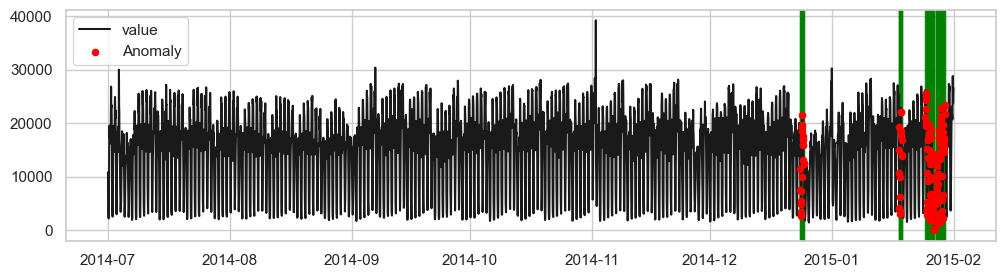

In [11]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=2, side='both', window=50)
anomalies = level_shift_ad.fit_detect(data)
plot_an(data, anomalies, fill_an=True )

Отдельно отметим __детектор волатильности__ `VolatilityShiftAD` - он обнаруживает изменение уровня волатильности, отслеживая разницу между стандартными отклонениями в двух скользящих временных интервалах, расположенных рядом друг с другом. В нашем случае значительной волотильности не ожидается, поэтмоу мы не увидим тут особых аномалий. Метод чувствителен к локальным аномалиям.

<Axes: >

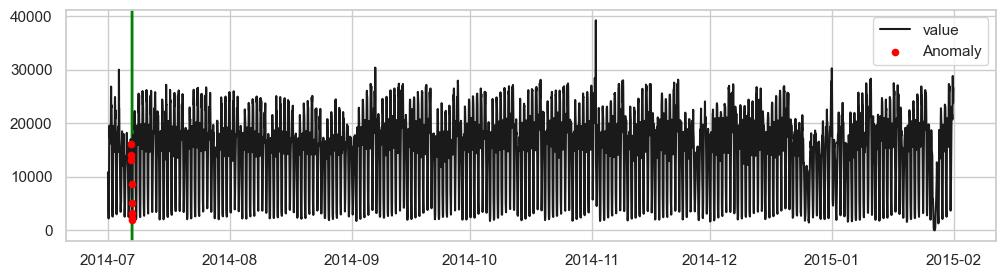

In [12]:
from adtk.detector import VolatilityShiftAD
volatility_shift_ad = VolatilityShiftAD(c=4.0, side='positive', window=50)
anomalies = volatility_shift_ad.fit_detect(data)
plot_an(data, anomalies, fill_an=True)

Воспользуемся встроенным __детектором сезонных аномалий__ `SeasonalAD`. Отмечается что в своей основе это уже использованное нами `STL` разложение. ОДнако тут используется не искажение одной - сезонной компоненты. Метод чувствителен к локальным аномалиям.

<Axes: >

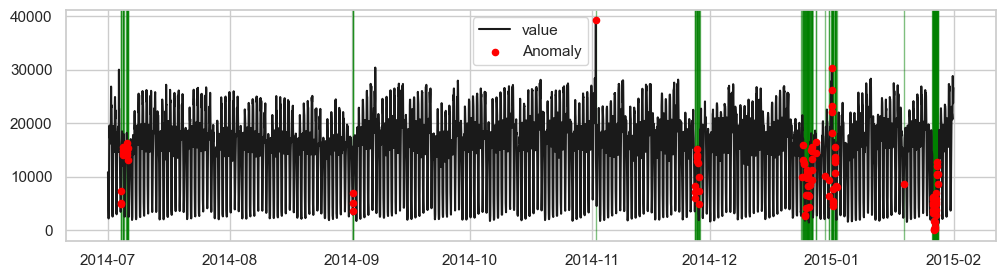

In [13]:
from adtk.detector import SeasonalAD
seasonal_vol = SeasonalAD(c=4.0, side="both")
anomalies = seasonal_vol.fit_detect(data.value)
anomalies.value_counts()

plot_an(data, anomalies, fill_an=True)

### Преобразования данных в `ADTK`

Данные во временных рядах можно рассматривать как в чистом виде, так и преобразовать. Часто аномалии, являющиеся локальными в одном ряду могут быть выявлены как глобальные в другом ряду. Мы уже видили примеры таких преобразования, когда раскладывали ряд методом `STL` или использовали одно или несколько окон для преобразования ряда.  Однако, помимо уже изученных методов могут быть рассмотрены и последовательности, включающие пользовательские варианты преобразований.

Ряд таких преобразований могту быть найдены в фреймворке `sktime` или, например, в [`adtk`](https://adtk.readthedocs.io/en/stable/notebooks/demo.html#Transformer). В `adtk` преобразования задаются с использованием функций агрегации `agg` и окном преобразования `window`. Воспользуемся функцией  `RollingAggregate` (__скользящее октно__) c использоавнием агрегатора `mean`.  Также посмотрим на агрегатор `std`. 

> Важно отметить, что чем длиней окно в такхи функциях, тем, как правило, сильней устраняется сезонность. Особенно сезонность с небольшим периодом. Такие окна действуют как некоторый фильтр. Фильтры могут устранять случайные эффекты, но могут и фильтровать полезную информацию, если размер окна не верный.

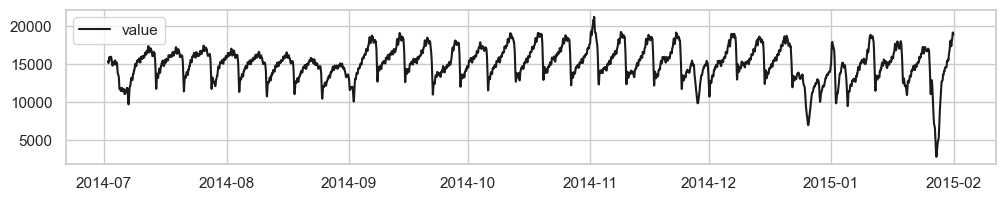

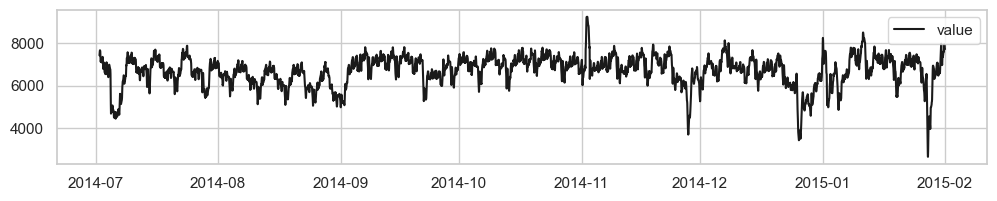

In [15]:
from adtk.transformer import RollingAggregate

data_t = RollingAggregate(agg='mean', window=25).transform(data)
plot_an(data_t, figsize=(12,2));
data_t = RollingAggregate(agg='std', window=25).transform(data)
plot_an(data_t, figsize=(12,2));

Покажем, что преобразования данных способствуют выявлению локальных аномалий.

In [14]:
def score2IRQ(data,score, c= 1.0):
    score = pd.DataFrame(score, columns=['value'], index = data.index)
    iqr_ad = InterQuartileRangeAD(c=c)
    anomalies = iqr_ad.fit_detect(score)
    anomalies = anomalies.squeeze()
    plot_an(data, anomalies)

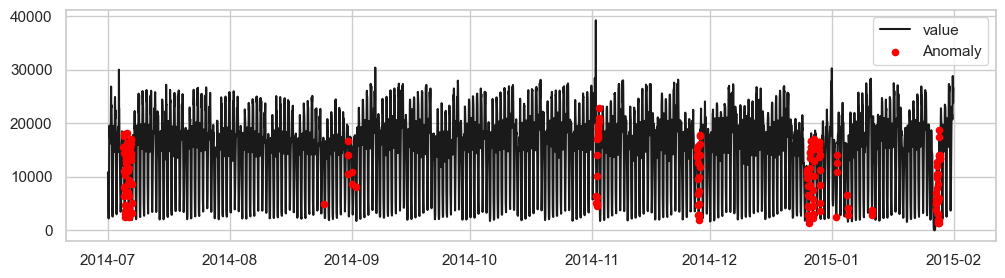

In [17]:
score2IRQ(data,data_t, c= 1.5)

Агрегатор `DoubleRollingAggregate` перемещает __два скользящих окна__ параллельно по временному ряду, выполняет агрегирование с использованием выбранной операции и отслеживает разницу в агрегированных показателях между двумя окнами. Это может помочь отслеживать изменения статистического поведения во временном ряду или коллективных анаомалий.

В примере мы оценим параметры статистического распределния. Для этого будем аггрегировать значение квантилей (`quantile`). Для указания квантилей воспользуемся функцией `agg_params`.

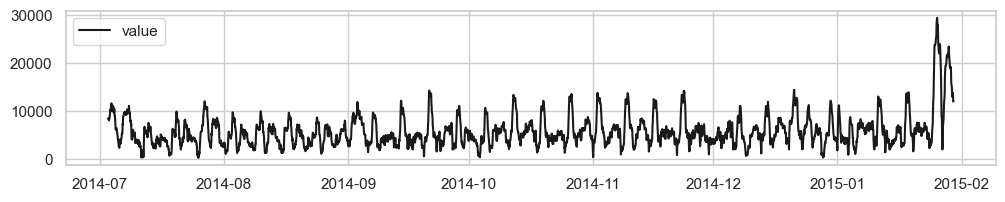

In [18]:
from adtk.transformer import DoubleRollingAggregate
data_t = DoubleRollingAggregate(
    agg="quantile",
    agg_params={"q": [0.1, 0.5, 0.9]},
    window=50).transform(data)
plot_an(data_t,  figsize=(12,2));

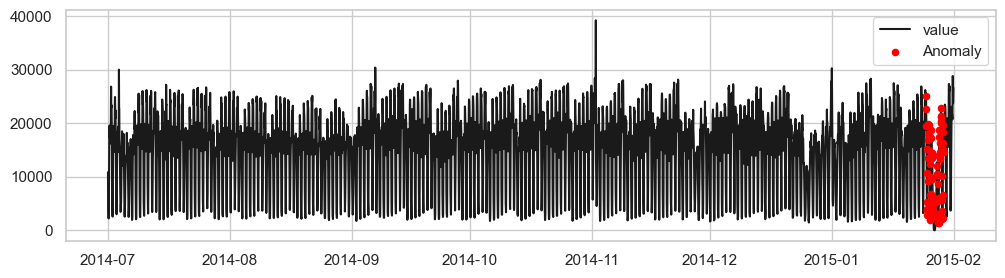

In [20]:
score2IRQ(data,data_t, c= 2.5)

Теперь посмотрим на функционал втсроенного __метода выделения остатка декомпозии ВР__ `ClassicSeasonalDecomposition`. По существу метод лишь выделяет наиболее долговременный тренд и стационарную сезонность из данных. В методе отдельно могут быть указаны сезонность и тренд для конфигурирования выхода.

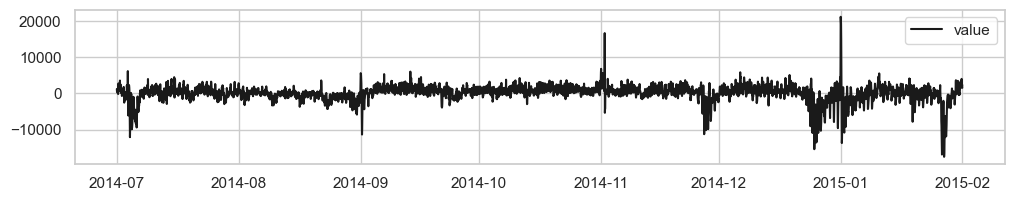

In [23]:
from adtk.transformer import ClassicSeasonalDecomposition
data_t = ClassicSeasonalDecomposition().fit_transform(data)
plot_an(data_t,  figsize=(12,2));

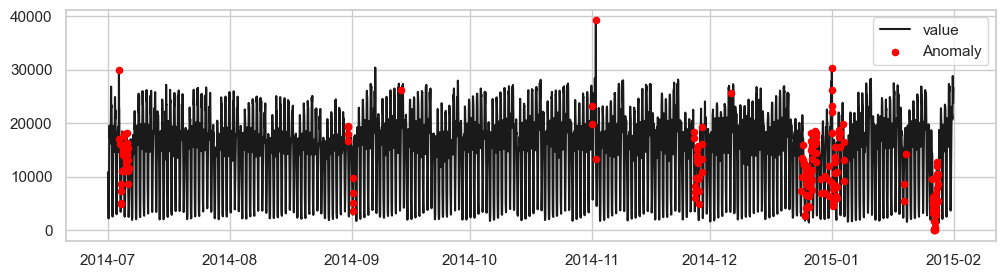

In [25]:
score2IRQ(data,data_t, c= 2.5)

Фреймворк `adtk` позволяет объеденять указанные методы преобразования с детекторами в пайплайны. Для этого используется метод `Pipeline`. Метод действует аналогично `sklearn`.

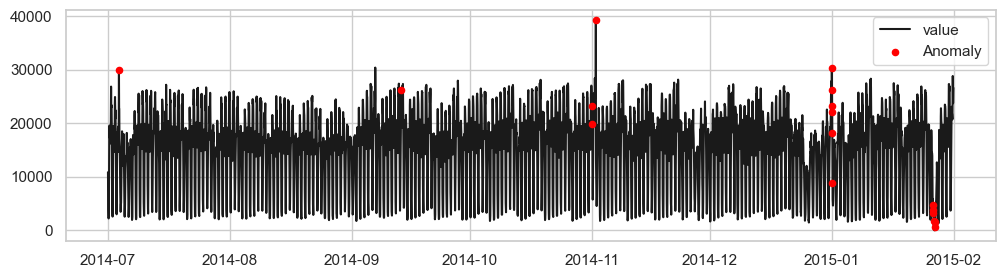

In [50]:
from adtk.pipe import Pipeline
steps = [
    ("deseasonal", ClassicSeasonalDecomposition()),
    ("quantile_ad", QuantileAD(high=0.998, low=0.001))
]
pipeline = Pipeline(steps)
anomalies = pipeline.fit_detect(data)
plot_an(data, anomalies, fill_an=False); 

Отдельно отметим, что фреймворк `adkt` не развивается на сегодня. 

Часть функционала, кажется необходимого для `rule-based methods` может быть найдена и за пределами фреймворка. Например ряд аномалий лучше всего могут быть выявлены путем численного дифференцирования. Тут могут быть рассмотрены как стандартное, так и сезонное дифференцирование. Для теста покажем аномалии на исходном ВР и на результате его диффиренцирования.

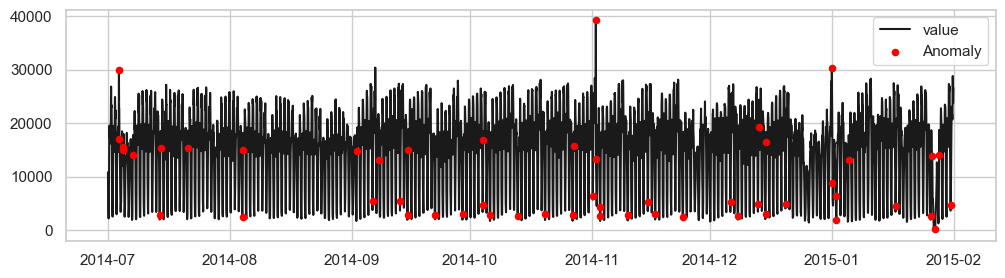

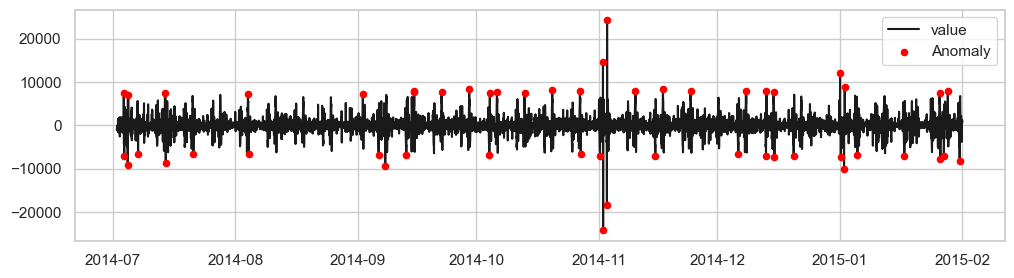

In [51]:
quantile_ad = QuantileAD(high=0.995, low=0.005)
anomalies = quantile_ad.fit_detect(data.value.diff(1).diff(24))
plot_an(data, anomalies);
plot_an(pd.DataFrame(data.value.diff(1).diff(24)).dropna(), anomalies);

## Методы на основе машинного обучения 

Рассмотрим несколько, вероятно уже известных, методов обнаружения аномалий [в табличных данных](https://scikit-learn.org/stable/modules/outlier_detection.html#isolation-forest) в применении к ВР. Напомним, что эти методы способны выделять только точечные аномалии причем не зависимо от порядка следования данных.   

* __Изоляционный лес__ ([__`IsolationForest`__](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)) построен на следущем принципе.   __Аномалий мало и они разные (не регулярные) и значительно отличаются от остальных в своей локальной области__. Поэтому  если взять набор данных и случайным образом его разбивать на части много раз,  каждый по значению между максимальным и минимальным, то аномалии реже всего будут участвовать в таком разбиении. В силу отлчия от остальных данных аномалии также будут попадаться в виде минимумов или максимумов чаще остальных точек. Повторяя этот алгоритм несколько раз можно уточнить аномалии. Фактически в методе реалузется принцип того, что выбирая случайные подвыборки ВР мы можем выявить аномалии в каждой подвыборке как редкие события с нетипичными (крайними значениями) по некоторой метрике. При этом усреднение по набору таких реализаций повышает устойчивость таких методов. В этом смысле можно отнести алгоритм к метрическим, хоть и с не на столько явным принципом. Отметим, что `изоляционный лес` не предполагает нормального распределения и способен обнаруживать отклонения на многомерном уровне. Изолирующий лес эффективен в вычислительном отношении: алгоритм имеет линейную временную сложность с низкой константой и малыми требованиями к памяти. Поэтому он хорошо масштабируется для больших наборов данных.
* __кластеризация с выбросами__ ([__`DBSCAN`__](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html)) - это  алгоритм кластеризации данных на основе плотности клачтеров. напомним, что кластеризация - это метод обучения без учителя, при котором мы пытаемся сгруппировать точки данных по определенным признакам. Метод DBSCAN  основана на предположении, что кластеры - это плотные области в пространстве, разделенные областями с меньшей плотностью.
Для кластеризации отсчетов  [алгоритм `DBSCAN`](https://cartetika.ru/tpost/k05o2ndpf1-klasterizatsiya-prostranstvennih-dannih) отделяет области с высокой плотностью данных путем выбора центроидов кластеризации и определния двух парамеров: числа точек во круг центроида с расстоянием не больше заданного. При этом кластер считается таковым только если число точек в нем не меньше заданного.  Этот подход похож на кластеризацию по методу [`K-средних`](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/). Однако тут мы вместо того, чтобы определить число кластеров заранее мы определяем их плотность и размер.
* __Метод локального фактора выборсов__ ([__`Local Outlier Factor, LOF`__](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html)) измеряет локальное отклонение плотности кажого семпла по отношению к его соседям. Локальность заключается в том, что оценка аномальности зависит от того, насколько изолирован объект по отношению к окружающим его k-ближайшими соседями. Расстояние между соседями используется для оценки локальной плотности. Сравнивая локальную плотность образца с локальными плотностями его соседей, можно выявить образцы, плотность которых значительно ниже, чем у их соседей. Такие образцы считаются выбросами. [Как правило](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html) число локальных соседей в этом методе выбирается порядка 20. Это связано с предположением о том, что выбросы не более 5\%. А также с тем, что кластеров в данных не должно быть слишьком много. [Сильной стороной](https://scikit-learn.org/stable/modules/outlier_detection.html#local-outlier-factor) алгоритма `LOF` является то, что он учитывает как локальные, так и глобальные свойства данных в силу локальности оценки каждой аномалии. Метод может показывать хорошие результаты даже в тех наборах данных, где аномальные выборки имеют различную плотность. Вопрос не в том, насколько изолирован образец, а в том, насколько он изолирован по отношению к окружающей его окрестности. По этой причине [метод также используется](https://scikit-learn.org/stable/modules/outlier_detection.html#novelty-detection-with-local-outlier-factor) для выявления новизны в данных.



In [52]:
y = data.value.values.reshape(-1, 1)

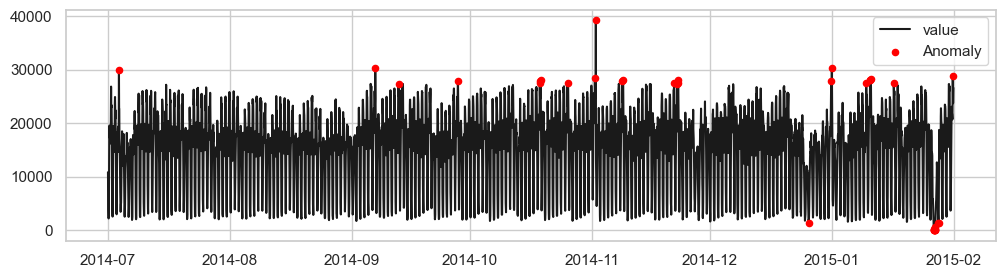

In [53]:
from sklearn.ensemble import IsolationForest

outliers_fraction = 0.007

model =  IsolationForest(contamination=outliers_fraction)
data['anomaly'] = model.fit_predict(y)
an = pd.DataFrame(data['anomaly']==-1).rename(columns={'anomaly':'value'})

plot_an(data, an);

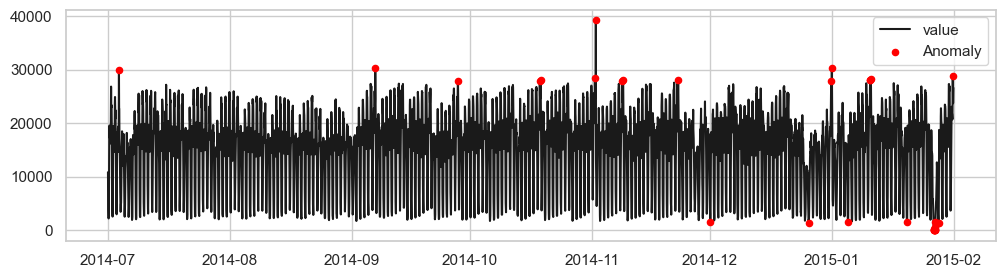

In [54]:
from sklearn.neighbors import LocalOutlierFactor

model = LocalOutlierFactor(novelty=True)
model.fit(y)
data['anomaly'] = model.predict(y)
an = pd.DataFrame(data['anomaly']==-1).rename(columns={'anomaly':'value'})

plot_an(data, an);

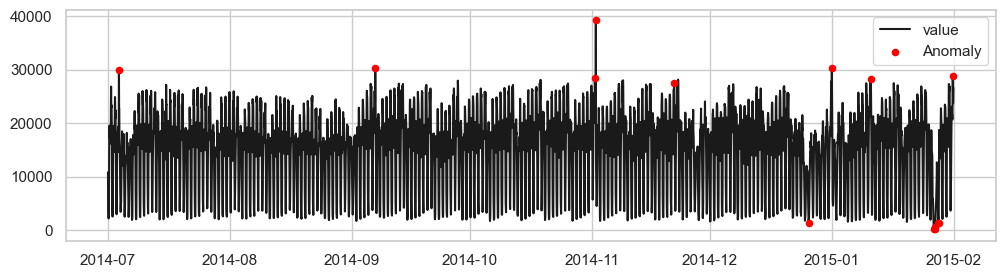

In [55]:
from sklearn.cluster import DBSCAN, KMeans
model=DBSCAN(eps = 100.)
# model = KMeans(n_clusters=10)
model.fit(y)
data['anomaly'] = model.fit_predict(y)
an = pd.DataFrame(data['anomaly']==-1).rename(columns={'anomaly':'value'})
plot_an(data, an);

## Выявление аномалий методом предсказаний 

Рассмотрим пример использования методов на основе моделей предсказания. Напомним, что в этом случае аномалиями признаются значения, которые выходят за диапазон предсказаний слишьком далеко. Другими словами значения со слишьком высокой ошибкой предсказания. То есть можно сказать что аномальными должны являться не сами предсказания, а их ошибка (осток предсказания). 

Отметим, что в этом подходе есть несколько вариантов реализации. Аномалии могут определяться как значения с аномальной ошибкой, как говорилось выше. Также аномалии могут определяться как значения выходящие за заданный интервал уверенности предсказаний. То есть если вместо точечного строится интерльваный прогноз, то аномалиями будут все значения, выходящие за этот интервал. Эти два метода похоже по своей интуции, но могут различаться в деталях реализации. В том числе в том, как будет обрабатываться ошибка предсказания или в том как будет определяться интервал достоверных предсказаний. 
> Также укажем как одно из достоинств метода возможность оценки некоторой `важности аномалии` как относительного значения ошибки, явлюящейся выбросом.

Напомним, что ряд методов имеют встроенную оценку интервалов предсказаний. Кроме того результаты работы будут зависить от выбора модели и ее параметров. Среди таких методов мы рассмотрим один на основе модели [`prophet`](https://neptune.ai/blog/anomaly-detection-in-time-series). Для работы с данным методом зададим объект `Prophet` c указанием диапазона предсказааний.

In [56]:
t = pd.DataFrame()
t['ds'] = data.index
t['y'] = data['value'].values

In [57]:
from prophet import Prophet

In [58]:
interval_width = 0.95 
changepoint_range = 0.8
    
m = Prophet(daily_seasonality  = False, 
            yearly_seasonality = False, 
            weekly_seasonality = True,
            seasonality_mode = 'additive', 
            interval_width = interval_width,
            changepoint_range = changepoint_range)

m = m.fit(t)
pred = m.predict(t)

pred['y'] = t['y'].reset_index(drop = True)

pred.head(1)

09:31:05 - cmdstanpy - INFO - Chain [1] start processing
09:31:05 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y
0,2014-07-01,14466.711169,-291.782602,26437.773738,14466.711169,14466.711169,-1494.268602,-1494.268602,-1494.268602,-1494.268602,-1494.268602,-1494.268602,0.0,0.0,0.0,12972.442567,10844


Пометим предсказания как значения выходящии за предел верхней границы предсказания (`yhat_upper`) и нижней границы (`yhat_lower`).

In [63]:
pred = pred[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'y']].copy()
pred['anomaly'] = 0 #False
pred.loc[pred['y'] > pred['yhat_upper'], 'anomaly'] = 1 #True
pred.loc[pred['y'] < pred['yhat_lower'], 'anomaly'] = -1 #True
pred.index = pred['ds']
pred.head(1)

,ds,trend,yhat,yhat_lower,yhat_upper,y,anomaly
ds,,,,,,,
2014-07-01,2014-07-01,14466.711169,12972.442567,-291.782602,26437.773738,10844,0


Создадим оценку важности аномалии

In [67]:
pred['score'] = 0
pred.loc[pred['anomaly'] ==1, 'score'] = (pred['y'] - pred['yhat_upper'])/pred['y']
pred.loc[pred['anomaly'] ==-1, 'score'] = (pred['yhat_lower'] - pred['y'])/pred['y']
pred.loc[pred['anomaly'] ==-1, 'anomaly'] = 1
pred.head(1)

,ds,trend,yhat,yhat_lower,yhat_upper,y,anomaly,score
ds,,,,,,,,
2014-07-01,2014-07-01,14466.711169,12972.442567,-291.782602,26437.773738,10844,0,0.0


Визуализируем результат.

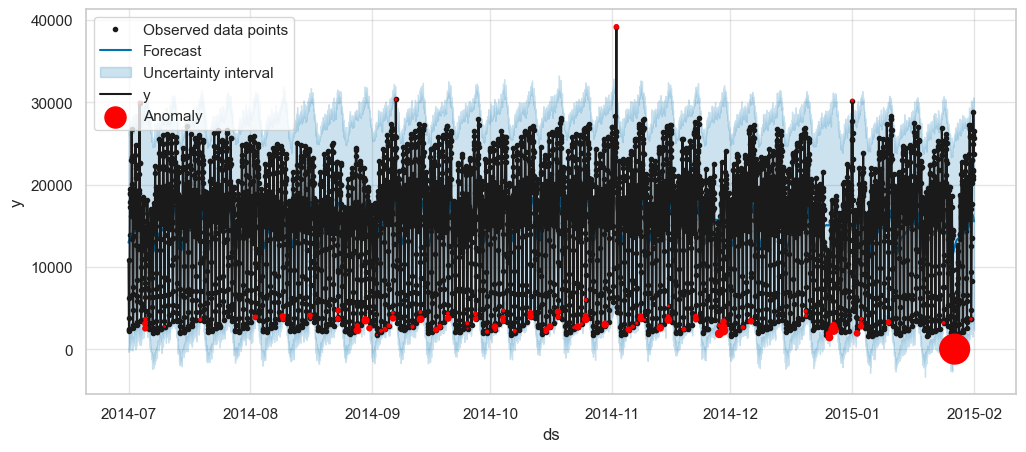

In [73]:
anomaly = pred[['anomaly','score']]


fig, ax = plt.subplots(figsize=(12,5))
m.plot(pred, ax = ax);
plot_an(pred, anomaly, column='y', ax = ax, anomaly_column='anomaly', score_column='score');

## Выявление аномалий методом восстоновления ряда.

По мимо стаднартного функционла [`sklearn`](https://scikit-learn.org/stable/modules/outlier_detection.html) для работы с аномалиями может быть реализован и более специфичный функционал. Например, может быть применен метод сжатия - восстоновления ВР. Для этого подойдет преобразования метода главных компонет (`PCA`). Создадим свой пример, в котором возьмем лаговую матрицу ВР, проведем ее сжатие методом `PCA` c последующим восстоновлением. В качестве меры аномалий `score` будем считать абсолютную ошибку реконструкции. 

Для построения лаговой матрицы будем использовать функцию `lags_matrix` библиотеки `dsatools` c заданным числом лагов. Фактически функция создает матриу, где каждый следующий столбец представляет собой сдвинутую копию предыдущего. В данном случае воспользуемся полной формой такой матрцы. То есть такой где недостающие значения заполняются нулями. Этоn прием можно предтсавить себе аналогично настройкам `padding` (`zero-padding`) сверток `full`. 

>Ометим, что лаговую матрицу мы уже использовали при построении авторегрессионных прогнозов с использованием методов машинного обучения. В нашем случае для ВР вида: $x=[1,2,3]$ матрица будет иметь вид:
$$m = \begin{bmatrix}
1 & 0 & 0\\
1 & 2 & 0\\
1 & 2 & 3\\
0 & 1 & 2\\
0 & 0 & 1\\
\end{bmatrix}$$

Для работы с полученной мерой (`score`) воспользуем `InterQuartileRangeAD`, который уже нам знаком.

> Важно также указать, что часто под методов реконструкции ВР подразумевают использование автоэнкодеров. Однако, это не единственный метод сжатия-реконструкции.

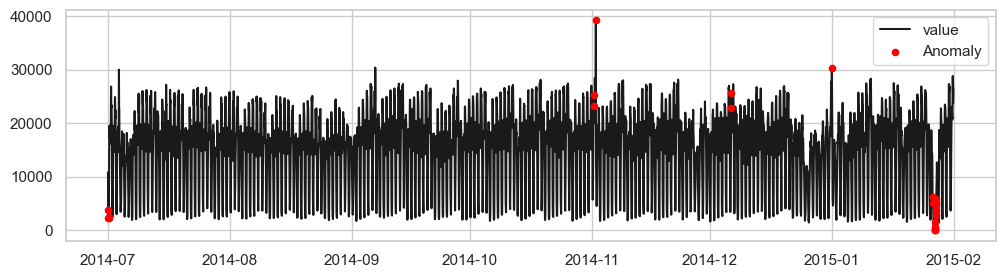

In [119]:
import dsatools.utilits as ut
from sklearn.decomposition import PCA, KernelPCA

m = ut.lags_matrix(y.squeeze(), lags = 24)

clf = PCA(n_components=2,)
X_new = clf.fit_transform(m)
X_rec = clf.inverse_transform(X_new)
score = X_rec.T[0,:y.size]-y.squeeze()


score2IRQ(data,score, c=0.9)    

Одако, заметим, что не слишьком много аномалий выявлены. Более часть выявленных аномалий не может не вызывать вопросы. Попробуем повычить способность к выявлению аномалий за счет не явного преобразования ВР. Для этого вместо обычного метода главных компонент используем ядерный метод (`KernelPCA`) c радиально базисным ядром `RBF`. Важно отметить, что естественным следствием такого подхода будет являться снижение интерпретируемости результатов. Кроме того результаты будут зависеть от выбранного коэффициента ядерного преобразования. В данном случае это `gamma`.

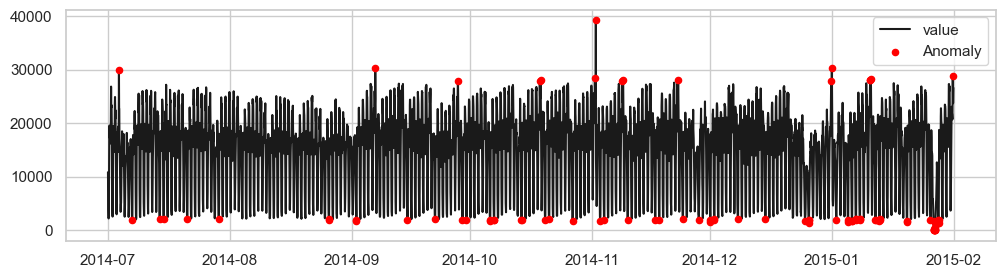

In [121]:
clf = KernelPCA(n_components=2, kernel='rbf', gamma=0.1, degree=3, coef0=1,fit_inverse_transform=True)
X_rec = clf.inverse_transform(clf.fit_transform(m))
score = X_rec.T[0,:y.size]-y.squeeze()

score2IRQ(data,score, c=0.9)   

В качестве сравнения давайте попробуем метод автоэнкодера. Мы будем использовать его реализации в библиотеке [`pyod`](https://pyod.readthedocs.io/en/latest/) - одной из наиболее популярных бибилотек использования методов машинного обучения в поиске аномалий. Тут используется полносвязный автоэенкодер. В нем мы также применим лаговую матрицу.

>Отметим, что авторы фреймворка  [`pyod`](https://pyod.readthedocs.io/en/latest/) имеют специальный вариант для многомерных временных рядов [`TODS`](https://tods-doc.github.io/). Однако, мы полагаем, то этот фреймворк потребовал бы отдельного урока.

In [137]:
import numpy as np
import pandas as pd
from pyod.models.auto_encoder import AutoEncoder

clf = AutoEncoder(hidden_neurons =[24,125, 256, 125, 24], verbose=-1)
clf.fit(m);

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

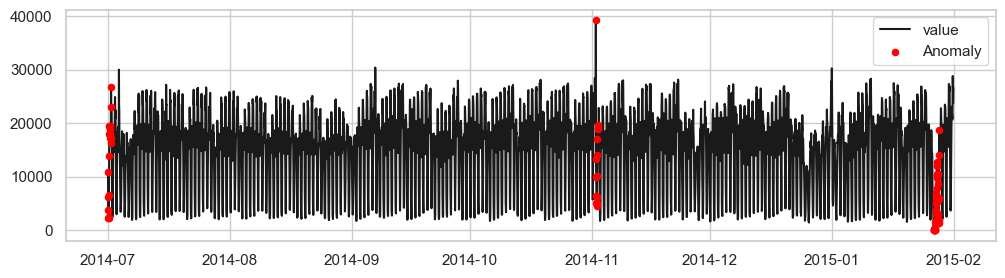

In [136]:
score = clf.decision_scores_[:data.shape[0]]
score2IRQ(data, score, c=2.5)  